In [1]:
%pprint

Pretty printing has been turned OFF


## 2016 Election Project 

This notebook is intended to document NER annotation of my data throughout this project. The data I am starting out with are transcripts of the presidential debates from the 2016 US Election- the 10 Democratic primary debates, the 12 Republican primary debates, and the debates for the general election between Hillary Clinton and Donald Trump. The transcripts were taken from UCSB's American Presidency Project. The citations for these transcripts can be found in the README.

In [2]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import glob
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import re

**First, this data needs to be cleaned up to remove SPEAKER: labels. Even though the participant and moderator information at the top include important entities, I'm want to remove it in order to have the tokenized sentences match my preexisting dataframes. Because the number of participants and moderators varies for each transcript, I manually created new files in the removed folder in transcripts/ with these portions removed. That is what I'll be processing.**

In [3]:
os.chdir('/Users/Paige/Documents/Data_Science/2016-Election-Project/data/Debates/transcripts/removed/')
files = glob.glob("*.txt")
files

['1-14-16_rep_removed.txt', '1-17-16_dem_removed.txt', '1-25-16_dem_removed.txt', '1-28-16_rep_removed.txt', '10-13-15_dem_removed.txt', '10-19-16_removed.txt', '10-28-15_rep_removed.txt', '10-9-16_removed.txt', '11-10-15_rep_removed.txt', '11-14-15_dem_removed.txt', '12-15-15_rep_removed.txt', '12-19-15_dem_removed.txt', '2-11-16_dem_removed.txt', '2-13-16_rep_removed.txt', '2-25-16_rep_removed.txt', '2-4-16_dem_removed.txt', '2-6-16_rep_removed.txt', '3-10-16_rep_removed.txt', '3-3-16_rep_removed.txt', '3-6-16_dem_removed.txt', '3-9-16_dem_removed.txt', '4-14-16_dem_removed.txt', '8-6-15_rep_removed.txt', '9-16-15_rep_removed.txt', '9-26-16_removed.txt']

In [4]:
#I'm creating a list where each entry in the list is a transcript
transcripts = []
for f in files:
    fi = open(f, 'r')
    txt = fi.read()
    fi.close
    transcripts.append(txt)

In [5]:
print(transcripts[0][:200])

CAVUTO: It is 9:00 p.m. here at the North Charleston Coliseum and Performing Arts Center in South Carolina. Welcome to the sixth Republican presidential of the 2016 campaign, here on the Fox Business 


**Let's start out with one transcript and see what we can get working. I plan on trying NLTK's nltk.ne_chunk_sents() to do annotation. I don't know how well it will work for conversational data in this format, but I'll try it out because it's a simple place to start.**

In [196]:
debate1 = transcripts[2]
print(debate1[:500])

CUOMO: All right. We are live at Drake University in Des Moines, Iowa, to hear from the Democratic presidential candidates and the people who matter most in this election, the voters.

Welcome to our viewers in the United States and around the world, and, of course, here in Iowa, where we're being seen on our CNN affiliates across the state.

We also want to welcome our servicemen and -women who are watching on the American Forces Network around the world, and to our listeners on the Westwood On


In [239]:
removed_labels = []

for txt in transcripts:
    #Take care of all other speakers, labels
    txt = re.sub(r"([A-Z]+):", r"", txt)
    #This is to fix the /n/n[applause] problem, when there is a new speaker after the applause
    txt = re.sub(r"(]\n\n )", r"]. ", txt)
    removed_labels.append(txt)
print(removed_labels[0][:500])

 It is 9:00 p.m. here at the North Charleston Coliseum and Performing Arts Center in South Carolina. Welcome to the sixth Republican presidential of the 2016 campaign, here on the Fox Business Network. I'm Neil Cavuto, alongside my friend and co-moderator Maria Bartiromo.

 Tonight we are working with Facebook to ask the candidates the questions voters want answered. And according to Facebook, the U.S. election has dominated the global conversation, with 131 million people talking about the 2016


In [240]:
#removed_labels = []
#removed_labels.extend(transcripts)

In [243]:
#Sentence tokenization
sents = [nltk.sent_tokenize(transcript) for transcript in removed_labels]
#Those [applause]\n\n might cause problems later. I will have to check on those.
sents[0][:20]

[' It is 9:00 p.m. here at the North Charleston Coliseum and Performing Arts Center in South Carolina.',
 'Welcome to the sixth Republican presidential of the 2016 campaign, here on the Fox Business Network.',
 "I'm Neil Cavuto, alongside my friend and co-moderator Maria Bartiromo.",
 'Tonight we are working with Facebook to ask the candidates the questions voters want answered.',
 'And according to Facebook, the U.S. election has dominated the global conversation, with 131 million people talking about the 2016 race.',
 'That makes it the number one issue talked about on Facebook last year worldwide.',
 'Now, the seven candidates on the stage tonight were selected based on their standing in six national polls, as well as polls in the early-voting states of Iowa and New Hampshire, those standings determining the position on the stage of the candidates tonight.',
 'And here they are.',
 'Businessman Donald Trump.',
 '[applause]\n\nTexas senator Ted Cruz.',
 '[applause]\n\nFlorida senator

In [244]:
sents[0][0]

' It is 9:00 p.m. here at the North Charleston Coliseum and Performing Arts Center in South Carolina.'

In [245]:
dataframes[0].head(20)

,Date,Debate Type,Speaker,Sents
2,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...
3,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...
4,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo..."
5,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...
6,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h..."
7,1-14-16,primary_rep,BARTIROMO,That makes it the number one issue talked abou...
8,1-14-16,primary_rep,CAVUTO,"Now, the seven candidates on the stage tonigh..."
9,1-14-16,primary_rep,CAVUTO,And here they are.
10,1-14-16,primary_rep,CAVUTO,Businessman Donald Trump.
11,1-14-16,primary_rep,CAVUTO,[applause]\n\nTexas senator Ted Cruz.


In [246]:
#Word tokenization in each sentence
sent_toks = []
transcript_toks = []

for transcript in sents:
    for sent in transcript:
        transcript_toks.append(nltk.word_tokenize(sent))
    sent_toks.append(transcript_toks)
    transcript_toks = []

sent_toks[0][:5]

[['It',
  'is',
  '9:00',
  'p.m.',
  'here',
  'at',
  'the',
  'North',
  'Charleston',
  'Coliseum',
  'and',
  'Performing',
  'Arts',
  'Center',
  'in',
  'South',
  'Carolina',
  '.'],
 ['Welcome',
  'to',
  'the',
  'sixth',
  'Republican',
  'presidential',
  'of',
  'the',
  '2016',
  'campaign',
  ',',
  'here',
  'on',
  'the',
  'Fox',
  'Business',
  'Network',
  '.'],
 ['I',
  "'m",
  'Neil',
  'Cavuto',
  ',',
  'alongside',
  'my',
  'friend',
  'and',
  'co-moderator',
  'Maria',
  'Bartiromo',
  '.'],
 ['Tonight',
  'we',
  'are',
  'working',
  'with',
  'Facebook',
  'to',
  'ask',
  'the',
  'candidates',
  'the',
  'questions',
  'voters',
  'want',
  'answered',
  '.'],
 ['And',
  'according',
  'to',
  'Facebook',
  ',',
  'the',
  'U.S.',
  'election',
  'has',
  'dominated',
  'the',
  'global',
  'conversation',
  ',',
  'with',
  '131',
  'million',
  'people',
  'talking',
  'about',
  'the',
  '2016',
  'race',
  '.']]

In [247]:
nltk.pos_tag(sent_toks[0][0])

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('9:00', 'CD'),
 ('p.m.', 'NN'),
 ('here', 'RB'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('North', 'NNP'),
 ('Charleston', 'NNP'),
 ('Coliseum', 'NNP'),
 ('and', 'CC'),
 ('Performing', 'NNP'),
 ('Arts', 'NNP'),
 ('Center', 'NNP'),
 ('in', 'IN'),
 ('South', 'NNP'),
 ('Carolina', 'NNP'),
 ('.', '.')]

In [250]:
#POS tagging for each sentence
sent_pos = []
transcript_pos = []

for transcript in sent_toks:
    for sent in transcript:
        transcript_pos.append(nltk.pos_tag(sent))
    sent_pos.append(transcript_pos)
    transcript_pos = []

In [251]:
len(sent_pos[0])

1576

In [148]:
#Named Entity Chunking
transcripts_NER = []
for transcript in sent_pos:
    transcripts_NER.append(nltk.ne_chunk_sents(transcript))


In [149]:
first = list(transcripts_NER[0])

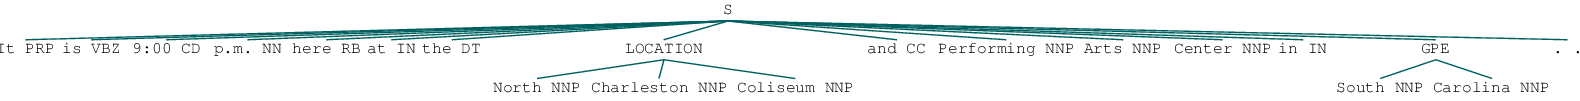

In [150]:
first[0]

In [151]:
len(first)

1507

In [88]:
import pickle
f = open('/Users/Paige/Documents/Data_Science/2016-Election-Project/data/Debates/csv/dataframes.p', 'rb')
dataframes = pickle.load(f)
f.close()

In [141]:
len(dataframes[0])

1597

All right.


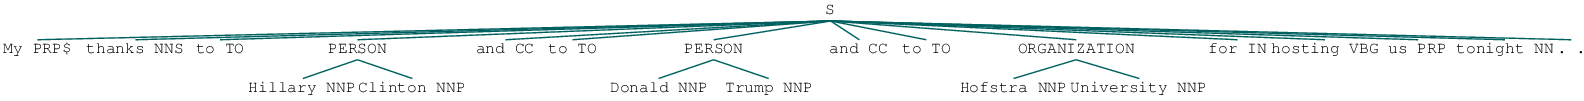

In [95]:
print(dataframes[0].iloc[-3][-1])
chunked_d1_list[-2]

In [80]:
dataframes[0].head()

,Date,Debate Type,Speaker,Sents,Trees
2,1-14-16,primary_rep,CAVUTO,It is 9:00 p.m. here at the North Charleston ...,<generator object ParserI.parse_sents.<locals>...
3,1-14-16,primary_rep,CAVUTO,Welcome to the sixth Republican presidential o...,<generator object ParserI.parse_sents.<locals>...
4,1-14-16,primary_rep,CAVUTO,"I'm Neil Cavuto, alongside my friend and co-mo...",<generator object ParserI.parse_sents.<locals>...
5,1-14-16,primary_rep,BARTIROMO,Tonight we are working with Facebook to ask t...,<generator object ParserI.parse_sents.<locals>...
6,1-14-16,primary_rep,BARTIROMO,"And according to Facebook, the U.S. election h...",<generator object ParserI.parse_sents.<locals>...


In [40]:
dataframes[0]['Trees'] = transcripts_NER[0]

ValueError: Length of values does not match length of index

In [14]:
d1chunked_sents = list(d1chunked_sents)
d1chunked_sents[1]

NameError: name 'd1chunked_sents' is not defined

In [ ]:
#It didn't get all of Secretary Clinton as the PERSON...just Clinton
print(d1chunked_sents[25])

In [ ]:
for sent in d1chunked_sents[:50]:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

**This does a nice job of pulling out the NE's, but it doesn't tell us where they're located in the text unless you look at the trees...**

In [ ]:
dir(d1chunked_sents[0][0])

In [ ]:
d1chunked_sents[3]

In [ ]:
d1chunked_sents[3].set_label('HOLT')

In [ ]:
d1chunked_sents[3]

**It's probably not smart to get rid of S as the head label... but maybe it would be helpful to change it to the speaker? There doesn't seem to be a way for me to link the NE's either.**

In [ ]:
#This section is with help from a datacamp tutorial
#https://campus.datacamp.com/courses/natural-language-processing-fundamentals-in-python/named-entity-recognition?ex=3

ner_categories = defaultdict(int)

# Create the nested for loop
for sent in d1chunked_sents:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

In [ ]:
people = []
for sent in d1chunked_sents:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            if chunk.label() == 'PERSON':
                people.append(chunk)

In [ ]:
gpe = []
for sent in d1chunked_sents:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            if chunk.label() == 'GPE':
                gpe.append(chunk)

In [ ]:
org = []
for sent in d1chunked_sents:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            if chunk.label() == 'ORGANIZATION':
                org.append(chunk)

In [ ]:
facility = []
for sent in d1chunked_sents:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            if chunk.label() == 'FACILITY':
                facility.append(chunk)

In [ ]:
len(people)

In [ ]:
len(gpe)

In [ ]:
len(org)

In [ ]:
len(facility)

In [ ]:
for x in facility:
    print(x)

In [ ]:
for x in org:
    print(x)

In [ ]:
people[1].leaves()[0][0]
words = [leaf[0] for leaf in people[1].leaves()]
words

In [ ]:
people_names = []
name = ''
for tree in people:
    for leaf in tree.leaves():
        name+=' '+str(leaf[0])
    people_names.append(name.strip())
    name = ''


In [ ]:
set(people_names)

In [ ]:
'Secretary' in people_names

In [ ]:
'Secretary Clinton' in debate1

In [ ]:
'Secretary Clinton' in people_names
#In fact it looks like it never recognizes Secretary Clinton as a PERSON. Just 'Clinton'

### Trying SpaCy

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('en')

In [ ]:
doc = nlp(debate1)

In [ ]:
len(doc.ents)

In [ ]:
for ent in doc.ents[:50]:
    print(ent.text, ent.label_)

In [ ]:
dir(doc.ents[0])

In [ ]:
doc.ents[0]

In [ ]:
doc.ents[0].end_char

In [ ]:
doc.ents[0].ent_id

In [ ]:
doc.ents[0].label_

In [ ]:
doc.ents[0].lemma_

In [ ]:
list(doc.ents[0].subtree)